Chris Holden (ceholden@gmail.com) - https://github.com/ceholden

Chapter 2: Your first remote sensing vegetation index
=====================================================

## Introduction
Now that we can read our data into the computer, let's calculate some vegetation indices.

The [Normalized Difference Vegetation Index (NDVI)](http://en.wikipedia.org/wiki/NDVI) is so ubiquitous that it even has a Wikipedia entry. If you're here for learning how to do remote sensing image processing this is a classic that you need to know. If you need a refresher, please visit the Wikipedia URL for [NDVI](http://en.wikipedia.org/wiki/NDVI).

This chapter will be very straightfoward. We've already seen how we can read our imagery into a NumPy array -- this chapter will simply extend these tools by showing how to do simple calculations on NumPy objects.

Let's bring up our previous code for opening our image and reading in the data:

In [44]:
import rasterio     # import the main rasterio function
from rasterio.plot import show

import matplotlib   # matplotlib is the primary python plotting and viz library
import matplotlib.pyplot as plt

# this bit of magic allows matplotlib to plot inline ina  jupyter notebook
%matplotlib inline  
import folium       # folium is an interactive mapping library

# Import the NumPy module
import numpy as np

# Open a GDAL dataset
dataset = rasterio.open('../../example/20181204_152426_0f4e/20181204_152426_0f4e_3B_AnalyticMS_SR.tif')
print(dataset.shape)

(4588, 8886)


Blue Band


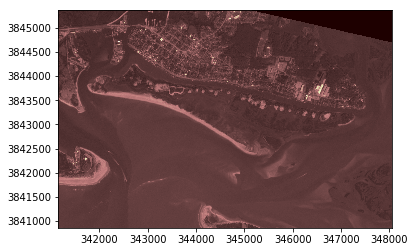

NIR Band


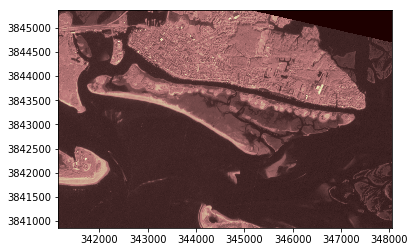

In [148]:
print("Blue Band")
rasterio.plot.show(dataset.read(1)[500:2000:, 1500:3800], transform=dataset.transform, cmap='pink')
plt.show()

print("NIR Band")
rasterio.plot.show(dataset.read(4)[500:2000:, 1500:3800], transform=dataset.transform, cmap='pink')
plt.show()

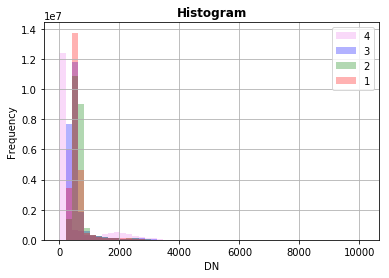

In [21]:
show_hist(dataset, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3)

Even from simple visualizations we can see the contrast between the red and the near-infared (NIR) bands.

## NDVI

To calculate NDVI, we can simply use standard arithmetic operators in Python because these operations in NumPy are vectorized. Just like MATLAB, R, and other higher level languages, **NEVER** loop over a NumPy array unless you can avoid it.

In [150]:
np.seterr(divide='ignore', invalid='ignore')
bandNIR = dataset.read(4)
bandRed = dataset.read(3)

#ndvi = ((full_img[b_nir, :, :].astype(float) - full_img[b_red, :, :].astype(float)) / (full_img[b_red, :, :].astype(float) + full_img[b_nir, :, :].astype(float))).astype(np.float64)
ndvi = np.zeros(bandNIR.shape, dtype=rasterio.float32)

ndvi = (bandNIR.astype(float)-bandRed.astype(float))/(bandNIR+bandRed)

# we have to run this because much of the image is NaN due to it not being an exact rectangle / projected 
ndvi = np.nan_to_num(ndvi)

In [151]:
print('\nMax NDVI: {m}'.format(m=ndvi.max()))
print('Mean NDVI: {m}'.format(m=ndvi.mean()))
print('Median NDVI: {m}'.format(m=np.median(ndvi)))
print('Min NDVI: {m}'.format(m=ndvi.min()))


Max NDVI: 0.7805872756933115
Mean NDVI: -0.14660824734964378
Median NDVI: 0.0
Min NDVI: -0.9965635738831615


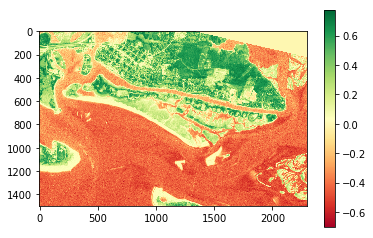

In [152]:
# Plot
plt.imshow(ndvi[500:2000:, 1500:3800], cmap="RdYlGn")
plt.colorbar()
plt.show()

#### This looks correct.

Speaking of *looking correct*, the next chapter (link to [webpage](chapter_3_visualization.html) or [Notebook](chapter_3_visualization.ipynb)) will demonstrate how you can visualize your results using actual plots!

#### Note: Python 2

In Python 2 an integer divided by an integer produces an integer, even if the division would have produced a float point number. Python 3 changed this behavior, but if we run the NDVI calculation with Python 2 we would end up with all of our NDVI values equal to 0 because our input image is an integer datatype (int16). See [documentation for division in NumPy for more information](http://docs.scipy.org/doc/numpy/reference/generated/numpy.divide.html).

While we don't necessarily need to change anything in Python 3, it is generally useful to be explicit with the datatypes involved in our calculations for the sake of clarity. Additionally, we generally also want code written using Python 3 to work with Python 2.

In order to ensure we perform our calculation using floating point numbers, we can cast the demoninator or numerator of the calculation to a float: